In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List

from scripts.utils import load_binary_from_eleven_sandstones

/home/pedro2/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
data_dir = project_root + "/data"
data_paths = [data for data in os.listdir(data_dir) if data.endswith(".raw")]
data_dict = {name[:-4]: load_binary_from_eleven_sandstones(data_dir + "/" + name) for name in data_paths}
names = list(data_dict.keys())

In [4]:
pd.Series(names)

0    Parker_2d25um_grayscale_filtered
1             Parker_2d25um_grayscale
2                Parker_2d25um_binary
dtype: object

Text(0.5, 1.0, 'Random slice of Parker_2d25um_grayscale_filtered at index 684')

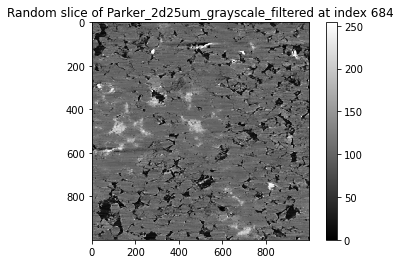

In [5]:
np.random.seed(0)
# plt.figure(figsize=(10, 10))
idx = np.random.randint(0, 1000)
sandstone = names[0]
slice = data_dict[sandstone][:, :, idx]
plt.imshow(slice,cmap="gray", interpolation="nearest")
plt.colorbar()
plt.title(f"Random slice of {sandstone} at index {idx}")

Text(0.5, 1.0, 'Window')

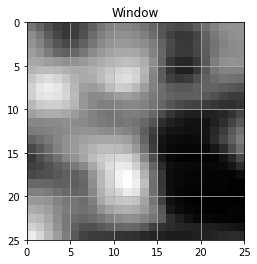

In [6]:
# np.random.seed(7)
l = slice.shape[0]
n = 25
idx_min, idx_max = int((n - 1) / 2), int(l - (n - 1) / 2)
i, j = 451, 320 # np.random.randint(idx_min, idx_max, size=2)
window_n = slice[i - idx_min:i + idx_min + 1, j - idx_min:j + idx_min + 1].copy()

plt.grid(True)
plt.xlim(0, n)
plt.ylim(n, 0)
plt.imshow(window_n, cmap="gray", extent=[0, n, n, 0])
plt.title("Window")

In [7]:
center_coord_x, center_coord_y = int((n-1)/2), int((n-1)/2)
center = window_n[center_coord_y, center_coord_x]
center

np.uint8(88)

TERMINAR DE MONTAR A ESPIRAL

In [9]:
operations = ['n','s','e','w']
op_seq = ['n', 'e', 's', 's', 'w', 'w', 'n', 'n'] 
data_template = [center]
current_coord_y, current_coord_x = center_coord_y, center_coord_x
for op in op_seq:
    if op == 'n':
        current_coord_y -= 1
        y, x = current_coord_y, current_coord_x
        pixel = window_n[y, x]
        print(f"Operation: {op}, Pixel: {pixel}, Coordenadas: ({x}, {y})")
        data_template.append(pixel)
    elif op == 's':
        current_coord_y += 1
        y, x = current_coord_y, current_coord_x
        pixel = window_n[y, x]
        print(f"Operation: {op}, Pixel: {pixel}, Coordenadas: ({x}, {y})")
        data_template.append(pixel)
    elif op == 'e':
        current_coord_x += 1
        y, x = current_coord_y, current_coord_x
        pixel = window_n[y, x]
        print(f"Operation: {op}, Pixel: {pixel}, Coordenadas: ({x}, {y})")
        data_template.append(pixel)
    else:
        current_coord_x -= 1
        y, x = current_coord_y, current_coord_x
        pixel = window_n[y, x]
        print(f"Operation: {op}, Pixel: {pixel}, Coordenadas: ({x}, {y})")
        data_template.append(pixel)

# data_template = np.array(data_template)
# data_template

Operation: n, Pixel: 85, Coordenadas: (12, 11)
Operation: e, Pixel: 76, Coordenadas: (13, 11)
Operation: s, Pixel: 70, Coordenadas: (13, 12)
Operation: s, Pixel: 74, Coordenadas: (13, 13)
Operation: w, Pixel: 101, Coordenadas: (12, 13)
Operation: w, Pixel: 115, Coordenadas: (11, 13)
Operation: n, Pixel: 97, Coordenadas: (11, 12)
Operation: n, Pixel: 89, Coordenadas: (11, 11)


In [10]:
def espiral_op_seq(n: int) -> List[str]:

    for i in range(3, n+1, 2):
        if i == 3:
            seq = 'n' + (i-2)*'e' + (i-1)*'s' + (i-1)*'w' + (i-1)*'n'
        else:
            seq += 'n' + (i-2)*'e' + (i-1)*'s' + (i-1)*'w' + (i-1)*'n'

    op_seq = list(seq)

    return op_seq


def data_template_from_op_seq(op_seq: List[str], window_n: np.ndarray, padding = 0) -> np.ndarray:
    
    center_coord_y, center_coord_x = int((n-1)/2), int((n-1)/2)
    center = window_n[center_coord_y, center_coord_x]
    data_template = [center]
    current_coord_y, current_coord_x = center_coord_y, center_coord_x
    
    for op in op_seq:
        
        if op.lower() == 'n':
            current_coord_y -= 1
            if current_coord_y < 0 or current_coord_y >= window_n.shape[0] or current_coord_x < 0 or current_coord_x >= window_n.shape[1]:
                y, x = current_coord_y, current_coord_x
                pixel = padding
                data_template.append(pixel)
            else:
                y, x = current_coord_y, current_coord_x
                pixel = window_n[y, x]
                data_template.append(pixel)

        elif op.lower() == 's':
            current_coord_y += 1
            if current_coord_y < 0 or current_coord_y >= window_n.shape[0] or current_coord_x < 0 or current_coord_x >= window_n.shape[1]:
                y, x = current_coord_y, current_coord_x
                pixel = padding
                data_template.append(pixel)
            else:
                y, x = current_coord_y, current_coord_x
                pixel = window_n[y, x]
                data_template.append(pixel)
        
        elif op.lower() == 'e':
            current_coord_x += 1
            if current_coord_y < 0 or current_coord_y >= window_n.shape[0] or current_coord_x < 0 or current_coord_x >= window_n.shape[1]:
                y, x = current_coord_y, current_coord_x
                pixel = padding
                data_template.append(pixel)
            else:
                y, x = current_coord_y, current_coord_x
                pixel = window_n[y, x]
                data_template.append(pixel)
        else:
            current_coord_x -= 1
            if current_coord_y < 0 or current_coord_y >= window_n.shape[0] or current_coord_x < 0 or current_coord_x >= window_n.shape[1]:
                y, x = current_coord_y, current_coord_x
                pixel = padding
                data_template.append(pixel)
            else:
                y, x = current_coord_y, current_coord_x
                pixel = window_n[y, x]
                data_template.append(pixel)

    return np.array(data_template)

In [12]:
n = 9
op_seq = espiral_op_seq(n)
data_template = data_template_from_op_seq(op_seq, window_n)
data_template

array([106,  72,  77, 107, 124, 128, 133, 110,  77,  63,  54,  58,  72,
        88, 112, 124, 124, 130, 143, 154, 160, 136, 115,  92,  79,  69,
        53,  43,  46,  61,  79,  87, 101, 119, 129, 126, 113, 116, 133,
       153, 167, 172, 167, 155, 136, 120, 105,  96,  89,  73,  58,  47,
        41,  45,  57,  71,  87,  93, 101, 111, 125, 136, 137, 120, 102,
       101, 110, 135, 155, 164, 167, 164, 151, 152, 144, 131, 122, 115,
       108, 103,  87], dtype=uint8)